# Week 14
# Hierarchical Clustering Analysis

In [1]:
# Importing required libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore') 
# This line ignores any warnings that may pop up
from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler

Let's use mall_customers.csv file and see how it would cluster.

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
selected_features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

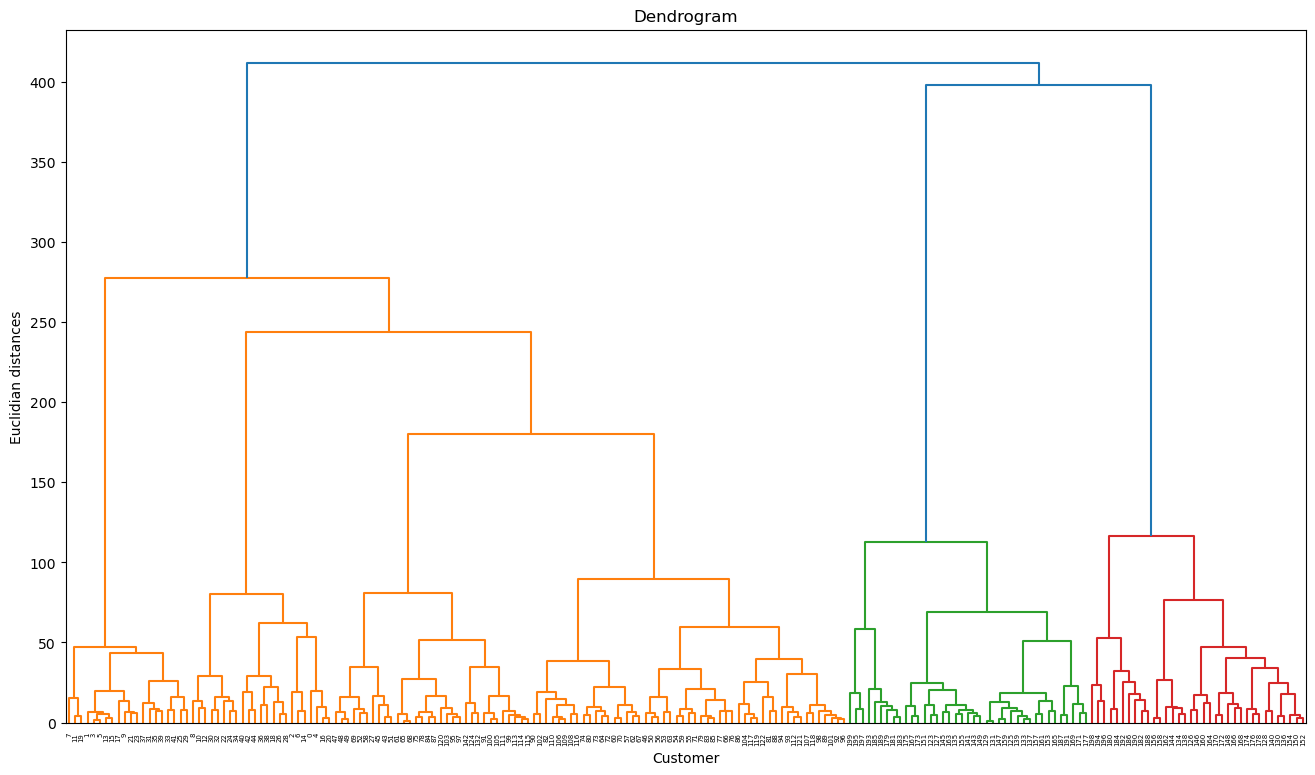

In [7]:
plt.figure(figsize=(16,9))
dendrogram = sch.linkage(selected_features, method='ward') # only takes numeric values
sch.dendrogram(dendrogram)
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidian distances')
plt.show()

In [8]:
labels = fcluster(dendrogram, t=5, criterion='maxclust')
print('cluster labels:', labels)

cluster labels: [2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 5 4 5 4 5 4 3 4 5 4 5 4 5 4 5 4 3 4 5 4 5 4
 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4]


AttributeError: Text.set() got an unexpected keyword argument 'font_size'

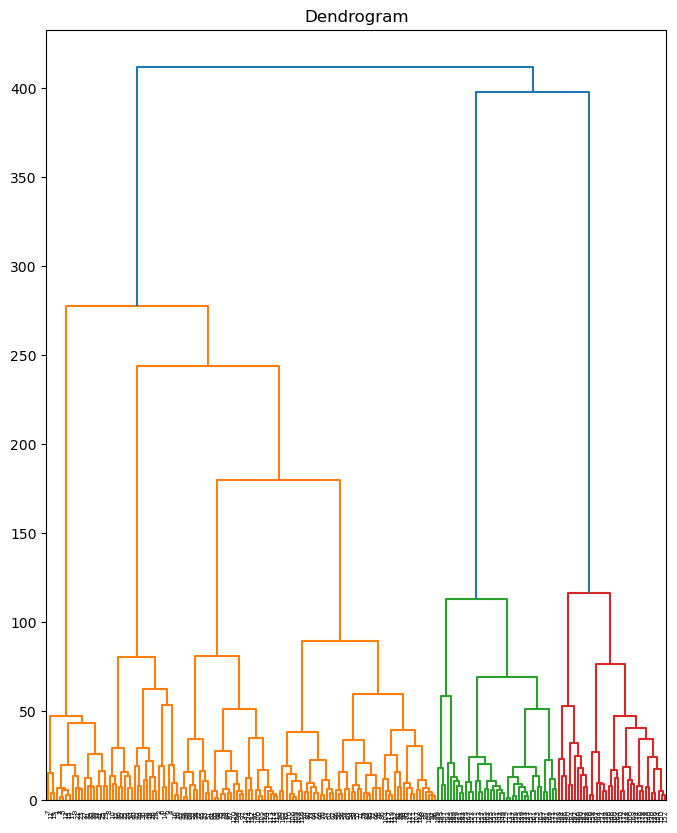

In [11]:
plt.figure(figsize=(8,10))
dendrogram = sch.dendrogram(sch.linkage(selected_features, method='ward'))
plt.title('Dendrogram', font_size=16)
plt.xlabel('Euclidean distance')
plt.ylabel('customers')
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')


In [13]:
y_hc = hc.fit_predict(selected_features)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [14]:
df['Cluster'] = pd.DataFrame(y_hc)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


Let's try another one using different data. This time we will use car data.

In [15]:
mt_cars = pd.read_csv('mtcars.csv')

In [16]:
mt_cars = mt_cars.set_index('model')

In [17]:
mt_cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [18]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(mt_cars)

Text(0, 0.5, 'Euclidean distance')

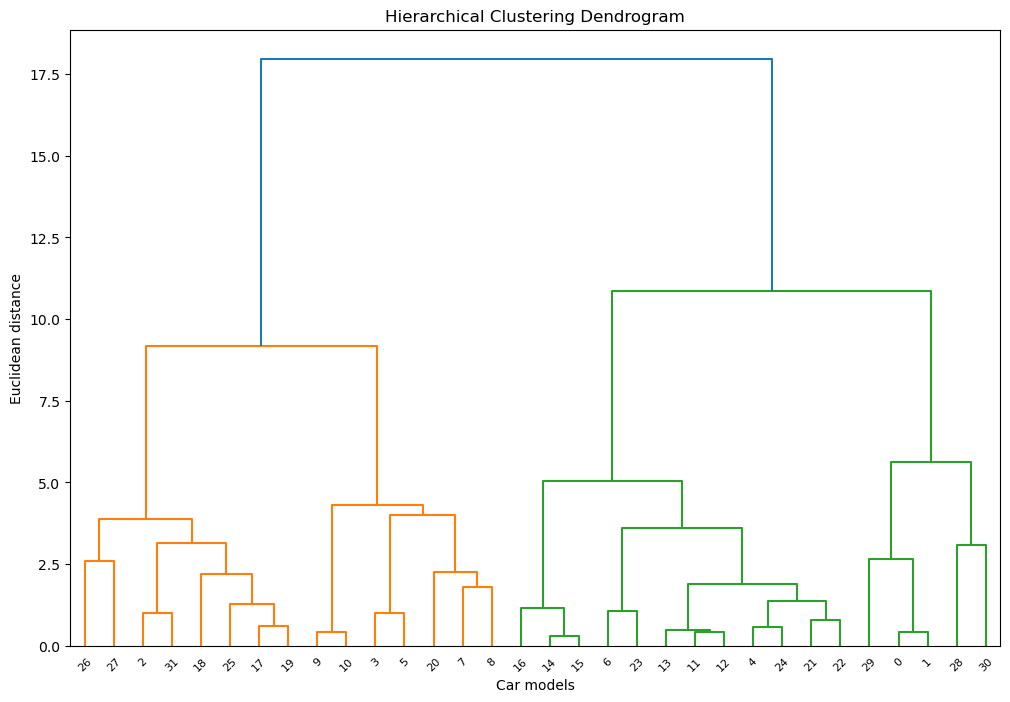

In [19]:
linkage_matrix = sch.linkage(normalized_data, method='ward')
plt.figure(figsize=(12, 8))
sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Car models')
plt.ylabel('Euclidean distance')
plt.show()

What happend to the labels? <br>
It is because we did not set anything as a label. <br>
Let's add leaf labels and improve our plot.

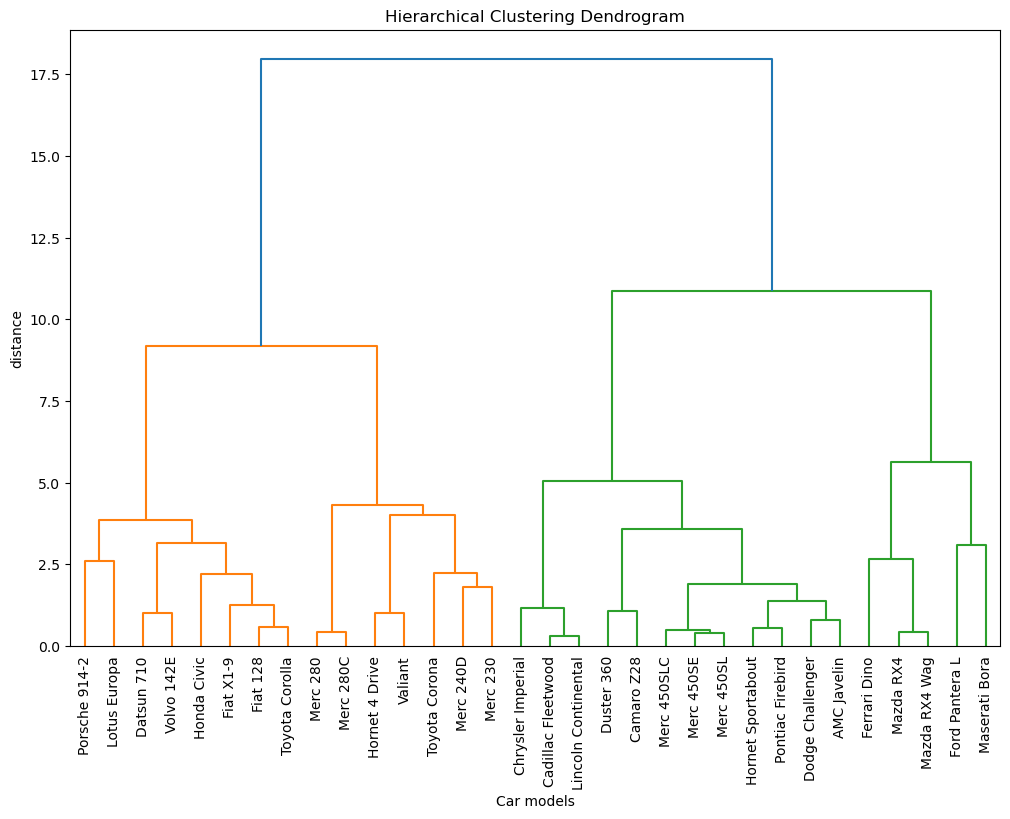

In [20]:
linkage_matrix = sch.linkage(normalized_data, method='ward')
plt.figure(figsize=(12, 8))
sch.dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=10, labels=mt_cars.index)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Car models')
plt.ylabel('distance')
plt.show()

We would need to 1) rotate the leaf label, 2)change the font size, and 3)add labels!

Let's change the orientation of dendrogram.

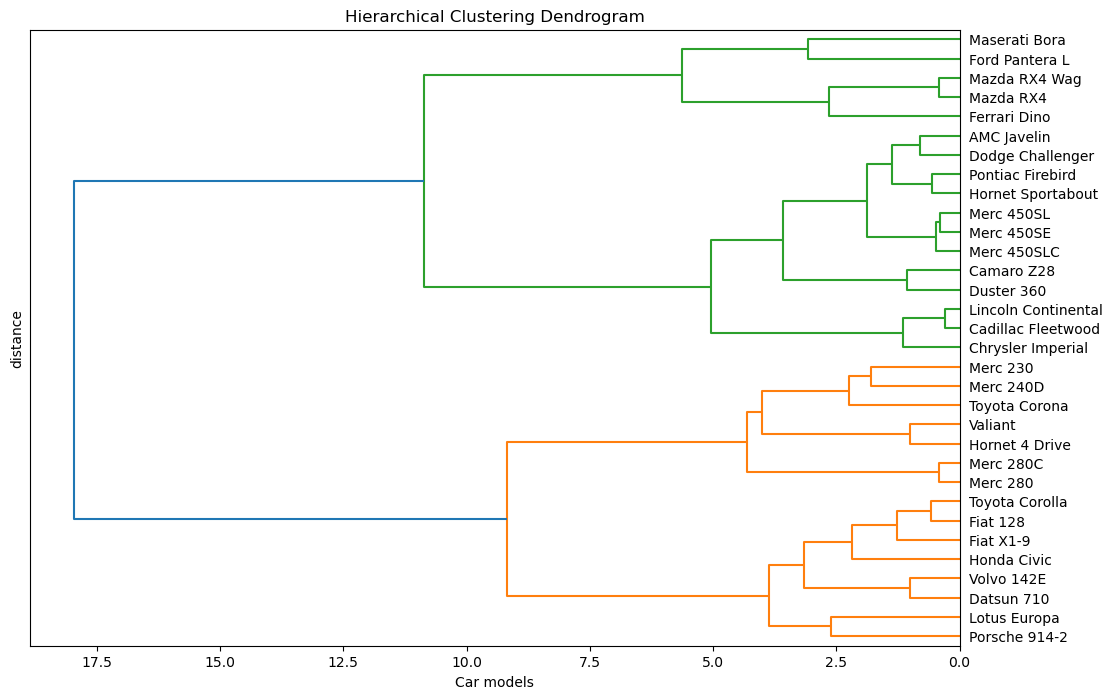

In [23]:
linkage_matrix = sch.linkage(normalized_data, method='ward')
plt.figure(figsize=(12, 8))
sch.dendrogram(linkage_matrix, orientation='left', leaf_font_size=10, labels=mt_cars.index)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Car models')
plt.ylabel('distance')
plt.show()

Setting the number of clusters.

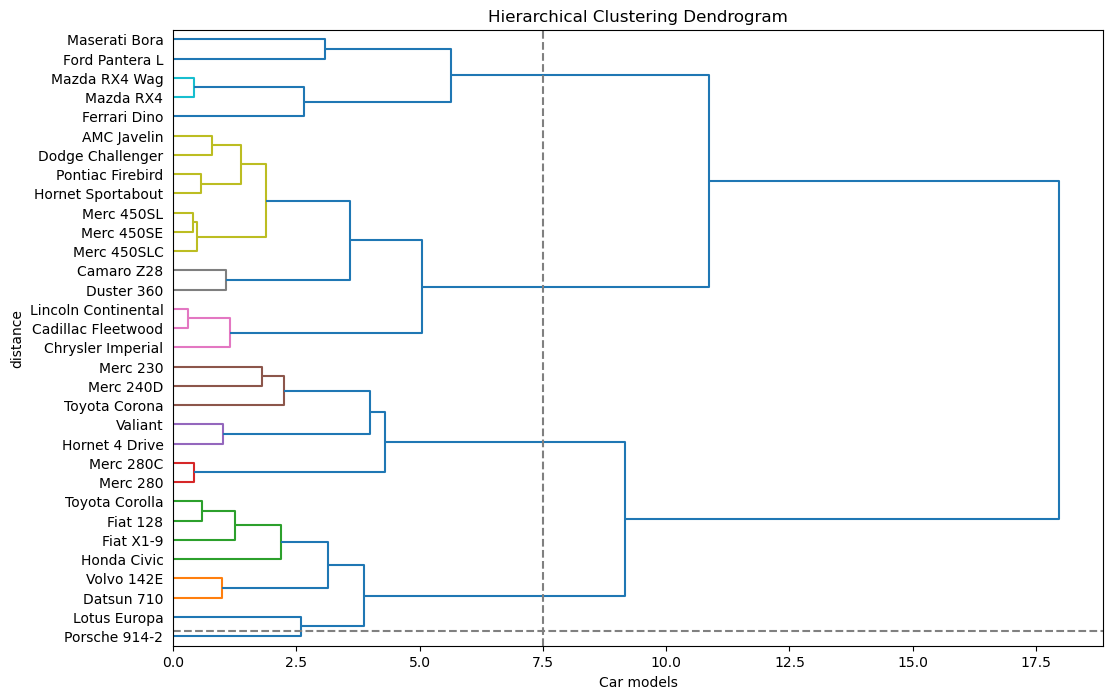

In [29]:
linkage_matrix = sch.linkage(normalized_data, method='ward')
plt.figure(figsize=(12, 8))
sch.dendrogram(linkage_matrix, color_threshold=2.5, leaf_rotation=0, orientation='right', leaf_font_size=10, labels=mt_cars.index)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Car models')
plt.ylabel('distance')
plt.axhline(y=7.5, c='grey', linestyle='dashed')
plt.axvline(x=7.5, c='grey', linestyle='dashed')
plt.show()

In [30]:
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
car = hc.fit_predict(normalized_data)
mt_cars['clusters'] = car
mt_cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,clusters
model,,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,3
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,2


Done for today!